In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

sns.load_dataset('tips').head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


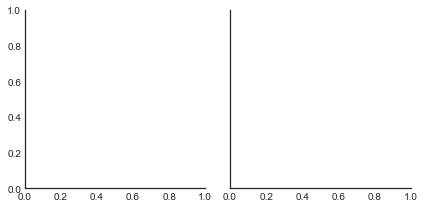

In [5]:
tips = sns.load_dataset('tips')
g = sns.FacetGrid(tips, col='time')

The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. Let’s look at the distribution of tips in each of these subsets, using a histogram:

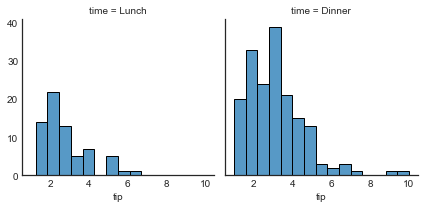

In [3]:
g = sns.FacetGrid(tips, col='time')
g.map(sns.histplot, 'tip')

This function will draw the figure and annotate the axes, hopefully producing a finished plot in one step. To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:

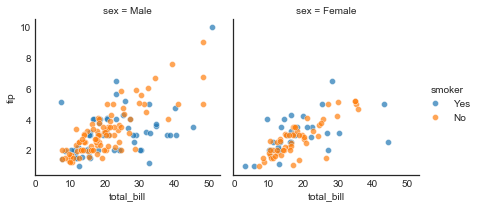

In [9]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

There are several options for controlling the look of the grid that can be passed to the class constructor.

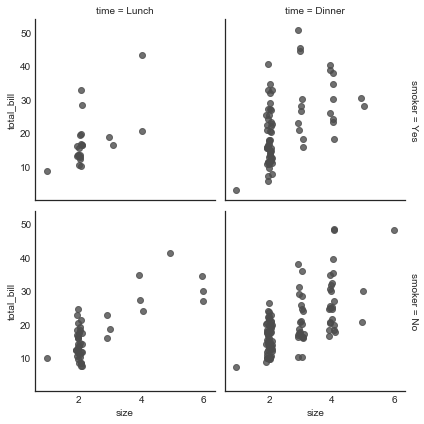

In [13]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', fit_reg=False, x_jitter=.1);

Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

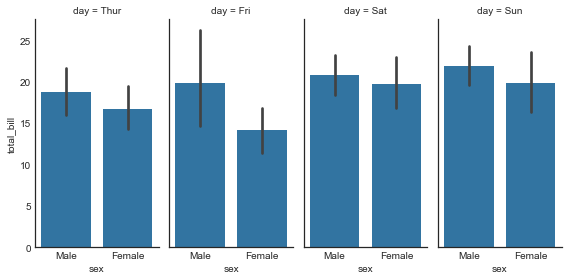

In [17]:
g = sns.FacetGrid(tips, col='day', height=4, aspect=.5)
# Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
g.map(sns.barplot, 'sex', 'total_bill', order=['Male', 'Female'])

The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate *_order parameter:

In [19]:
ordered_days = tips.day.value_counts().index
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

/Users/jay/opt/anaconda3/envs/codestates/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jay/opt/anaconda3/envs/codestates/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jay/opt/anaconda3/envs/codestates/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/jay/opt/anaconda3/envs/codestates/lib/python3.8/site-packages/matplotlib/cbook/__init_

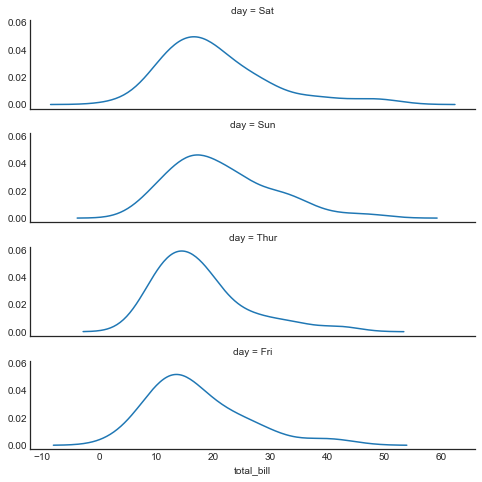

In [25]:
g = sns.FacetGrid(tips, row='day', row_order=ordered_days,
                 height=1.7, aspect=4)
g.map(sns.kdeplot, 'total_bill');

Any seaborn color palette (i.e., something that can be passed to color_palette() can be provided. You can also use a dictionary that maps the names of values in the hue variable to valid matplotlib colors:

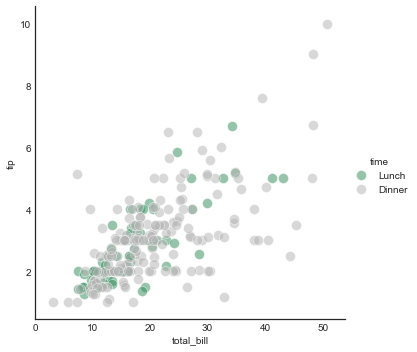

In [33]:
pal = dict(Lunch = 'seagreen', Dinner = '.7')
g = sns.FacetGrid(tips, hue='time', palette=pal, height=5)
g.map(sns.scatterplot, 'total_bill', 'tip', s=100, alpha=.5)
g.add_legend();

If you have many levels of one variable, you can plot it along the columns but “wrap” them so that they span multiple rows. When doing this, you cannot use a row variable.

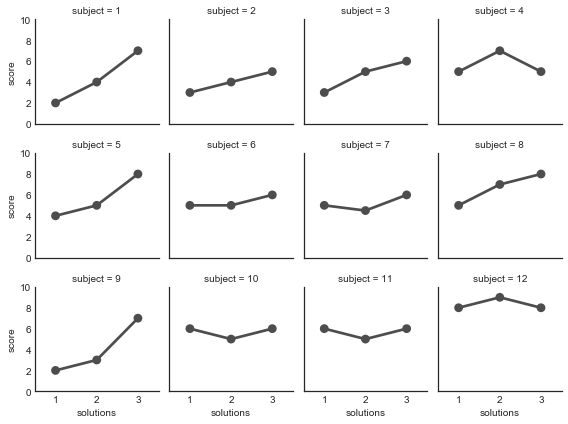

In [40]:
attend = sns.load_dataset('attention').query('subject <= 12')
g = sns.FacetGrid(attend, col='subject', col_wrap=4, height=2, ylim=(0, 10))
# “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.
g.map(sns.pointplot, 'solutions', 'score', order=[1, 2, 3], color='.3', ci=None)

Once you’ve drawn a plot using FacetGrid.map() (which can be called multiple times), you may want to adjust some aspects of the plot. There are also a number of methods on the FacetGrid object for manipulating the figure at a higher level of abstraction. The most general is FacetGrid.set(), and there are other more specialized methods like FacetGrid.set_axis_labels(), which respects the fact that interior facets do not have axis labels. For example:

AttributeError: 'FacetGrid' object has no attribute 'figure'

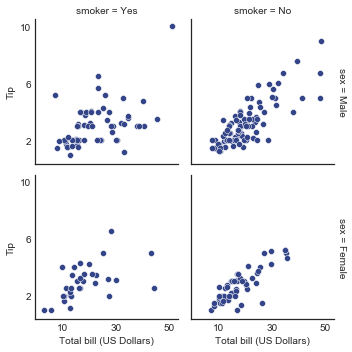

In [45]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
    
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

For even more customization, you can work directly with the underling matplotlib Figure and Axes objects, which are stored as member attributes at figure and axes_dict, respectively. When making a figure without row or column faceting, you can also use the ax attribute to directly access the single axes.

AttributeError: 'AxesSubplot' object has no attribute 'axline'

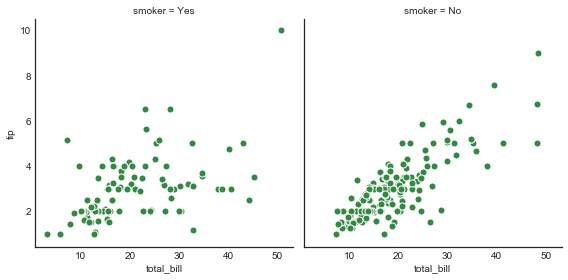

In [46]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))